In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dfdgdgfg/sss.png
/kaggle/input/last-model/last.pkl
/kaggle/input/bbbbsaf/bsevem.png
/kaggle/input/bbbbsaf/bseven.png
/kaggle/input/my-numberss/four.png
/kaggle/input/my-numberss/six.png
/kaggle/input/my-numberss/seven.png
/kaggle/input/my-numberss/three.png
/kaggle/input/my-numberss/nine2.png
/kaggle/input/my-numberss/eight.png
/kaggle/input/my-numberss/two.png
/kaggle/input/my-numberss/one.png
/kaggle/input/my-numberss/seven2.png
/kaggle/input/my-numberss/five.png
/kaggle/input/my-numberss/zero.png
/kaggle/input/model-digit/digit_model.pkl
/kaggle/input/hdshdshd/four.png
/kaggle/input/hdshdshd/six.png
/kaggle/input/hdshdshd/seven3.png
/kaggle/input/hdshdshd/nine3.png
/kaggle/input/hdshdshd/seven4.png
/kaggle/input/hdshdshd/seven.png
/kaggle/input/hdshdshd/three.png
/kaggle/input/hdshdshd/sevennn.png
/kaggle/input/hdshdshd/nine2.png
/kaggle/input/hdshdshd/two1.png
/kaggle/input/hdshdshd/eight1.png
/kaggle/input/hdshdshd/three1.png
/kaggle/input/hdshdshd/eight.png
/kaggle/

In [2]:
import tensorflow as tf # Mnist dataset containing 60k train and 10k test data
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist # this is basically handwritten characters based on 28x28 sied images of 0 to 9

In [4]:
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
y_train.shape

(60000,)

In [6]:
# Let's look at the number of digit
x = list(y_train)
for i in range(10):
    print(f'Number of {i} is',x.count(i))

Number of 0 is 5923
Number of 1 is 6742
Number of 2 is 5958
Number of 3 is 6131
Number of 4 is 5842
Number of 5 is 5421
Number of 6 is 5918
Number of 7 is 6265
Number of 8 is 5851
Number of 9 is 5949


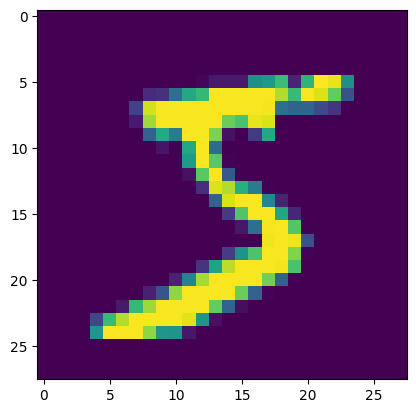

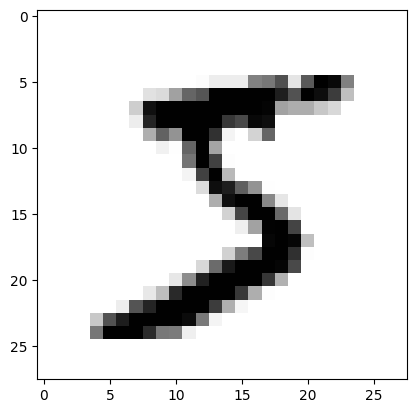

In [7]:
plt.imshow(x_train[0])
plt.show()

# We don't know whether it is color image or binary image
# in order to plot it, we change the configuration

plt.imshow(x_train[0], cmap = plt.cm.binary)

# Theoretically, pixels are shown with [0, 255] ranging from black to white 

# Normalizing the data | Pre-processing step

### Before normalization

### As images are in Gray level (1 channel ==> 0 to 255), not colored (RGB)

In [8]:
print(x_train[0]) # we see that all the background is black and the number is written with white color,
                  # however, in the cell above, when we used plt.cm.binary it reversed the color

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Normalization

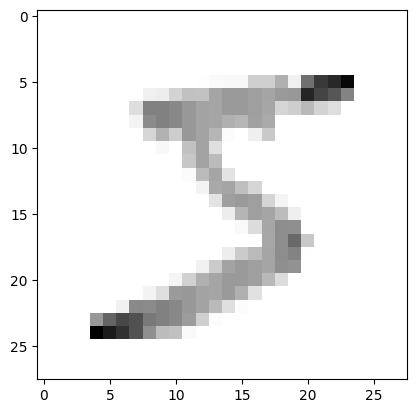

In [9]:
# We clearly, noticed that these all are gray images and values varies from 0 to 255
# So we need to normalize it, one method for this is dividing data to 255 or we can proceed as below:

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

plt.imshow(x_train[0], cmap = plt.cm.binary)

### After normalization

In [10]:
x_train[0] # we see our values vary from 0 to 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Resizing image to make it suitable for apply Convolution operator

In [10]:
IMG_size = 28

x_trainr = np.array(x_train).reshape(-1,IMG_size,IMG_size,1) # increasing 1 dimension for kernel=filter operator
x_testr = np.array(x_test).reshape(-1,IMG_size,IMG_size,1)

print(x_trainr.shape)
print(x_testr.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Creating Deep Neural Network

### Training on 60,000 samples of MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential # used to connect different layers of deep learning
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ReduceLROnPlateau,EarlyStopping


In [76]:
# Creating a neural network now

model = Sequential()

# 1st convolution layer
model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:])) # only for first convolution layer to mention input layer size 
model.add(Activation('relu')) # activation function to make it non-linear, if <0 remove, if >0 allow to pass
model.add(MaxPooling2D(pool_size = (2,2))) # it will get single maximum value of 2x2 matrix and the rest will be removed

# 2nd convolution layer
model.add(Conv2D(64,(3,3))) # 2nd convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# 3rd convolution layer
model.add(Conv2D(64,(3,3))) # 3nd convolution layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Fully connected layer # 1
model.add(Flatten()) # before using fully connected layer, need to be flatten so that it converts 2D to 1D
model.add(Dense(64)) # 
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer # 2
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Last fully connected layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense(10)) # this last dense layer must be equal to 10
model.add(Activation('softmax')) # activation function is changed to softmax (Class probabilities)

# for binary classification, one neuron in Dense layer and activation layer will be sigmoid( Dense(1))



In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_12 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_13 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [14]:
len(x_trainr)

60000

In [15]:
len(y_train)

60000

In [92]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['accuracy'])


# Applying Earlystopping technique

In [93]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True,verbose = 1)

### Mini-Batch Gradient Descent

In [94]:
history = model.fit(x_trainr, y_train, epochs = 40,validation_split = 0.2,batch_size = 16,callbacks=[early_stopping]) # training model

Epoch 1/40
3000/3000 [==============================] - 45s 14ms/step - loss: 0.1895 - accuracy: 0.9573 - val_loss: 0.1271 - val_accuracy: 0.9721
Epoch 2/40
3000/3000 [==============================] - 42s 14ms/step - loss: 0.1443 - accuracy: 0.9666 - val_loss: 0.1179 - val_accuracy: 0.9728
Epoch 3/40
3000/3000 [==============================] - 42s 14ms/step - loss: 0.1274 - accuracy: 0.9706 - val_loss: 0.1113 - val_accuracy: 0.9750
Epoch 4/40
3000/3000 [==============================] - 42s 14ms/step - loss: 0.1153 - accuracy: 0.9727 - val_loss: 0.1078 - val_accuracy: 0.9753
Epoch 5/40
3000/3000 [==============================] - 43s 14ms/step - loss: 0.1067 - accuracy: 0.9740 - val_loss: 0.1058 - val_accuracy: 0.9765
Epoch 6/40
3000/3000 [==============================] - 43s 14ms/step - loss: 0.0993 - accuracy: 0.9758 - val_loss: 0.1021 - val_accuracy: 0.9767
Epoch 7/40
3000/3000 [==============================] - 43s 14ms/step - loss: 0.0964 - accuracy: 0.9766 - val_loss: 0.1012 -

In [19]:
_, train_accuracy = model.evaluate(x_trainr,y_train)
_, test_accuracy = model.evaluate(x_testr,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0636 - accuracy: 0.9823


In [20]:
print(train_accuracy)
print(test_accuracy)

0.9871333241462708
0.9822999835014343


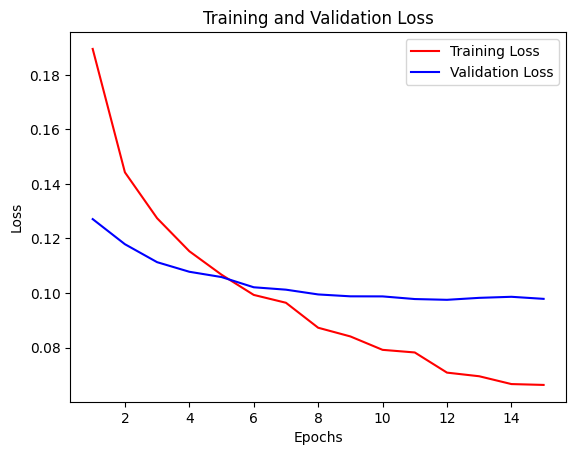

In [95]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting the loss vs. epoch graph
plt.figure()
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

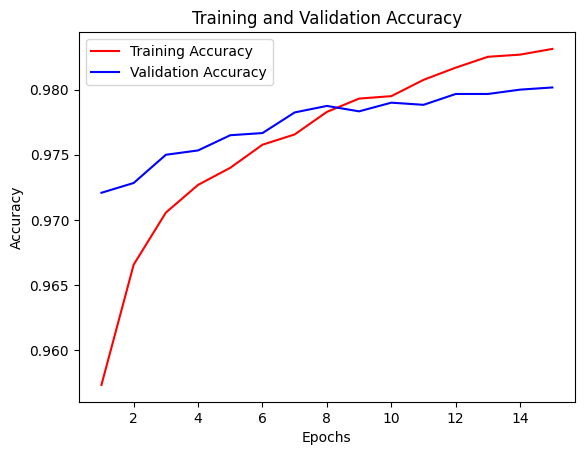

In [96]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plotting accuracy vs. epoch graph
plt.figure()
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
x_trainr.shape

(60000, 28, 28, 1)

# Saving the model

In [99]:
import pickle

# filename = 'last.pkl'

# with open(filename, 'wb') as file:
#     pickle.dump(model, file)
    
#Load the Model back from file
with open('/kaggle/input/last-model/last.pkl', 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

In [100]:
model = Pickled_LR_Model

In [20]:
# If accuracy >> validation accuracy, then it is overfitting. Solution can be dropping some layers

# Evaluating on testing dataset

In [37]:
from sklearn.metrics import classification_report

In [21]:
# Evaluating on testing data set MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test,batch_size = 1)

print('Test loss on 10,000 test samples', test_loss)
print('Validation accuracy on 10,000 test samples', test_acc)

10000/10000 [==============================] - 28s 3ms/step - loss: 0.0570 - accuracy: 0.9864
Test loss on 10,000 test samples 0.05702562257647514
Validation accuracy on 10,000 test samples 0.9864000082015991


In [33]:
predictions = model.predict([x_testr],batch_size = 1)

10000/10000 [==============================] - 17s 2ms/step


In [34]:
predicted_labels = np.argmax(predictions, axis=1)

In [36]:
if len(y_test.shape) > 1:
    true_labels = np.argmax(y_test, axis=1)
else:
    true_labels = y_test

In [38]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
predictions.shape

(10000, 10)

## Visualization of prediction on test dataset

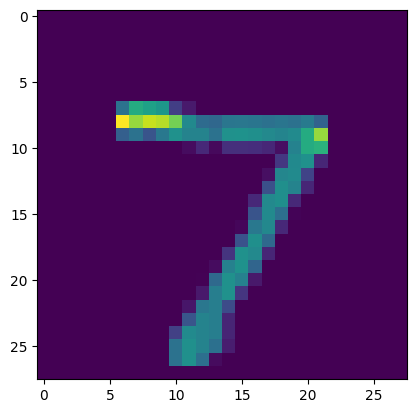

Predicted class label: 7
---------------------------------------------


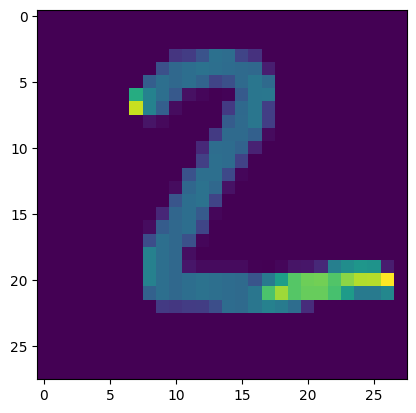

Predicted class label: 2
---------------------------------------------


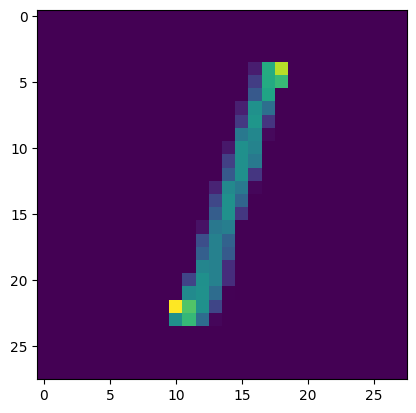

Predicted class label: 1
---------------------------------------------


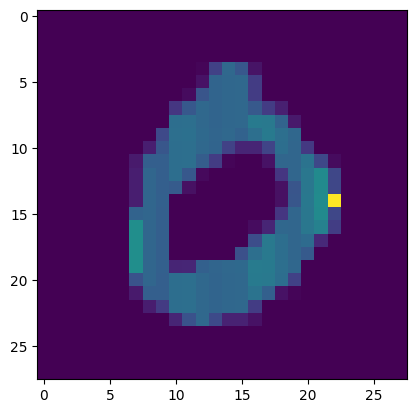

Predicted class label: 0
---------------------------------------------


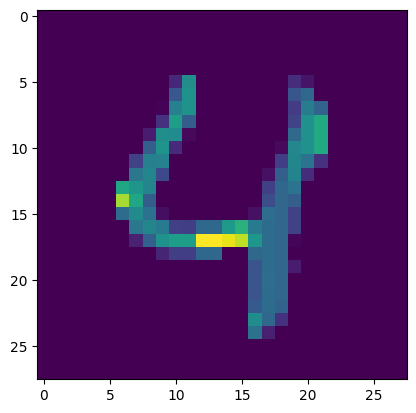

Predicted class label: 4
---------------------------------------------


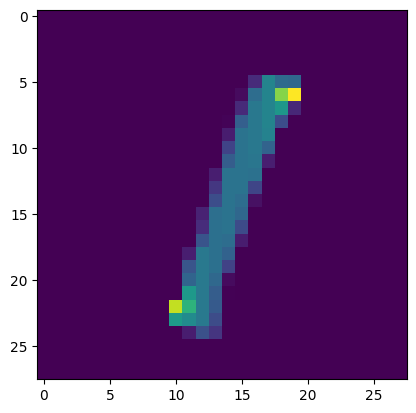

Predicted class label: 1
---------------------------------------------


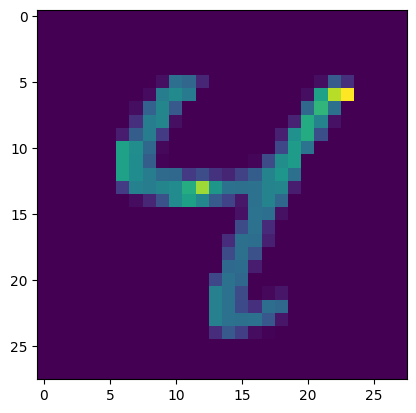

Predicted class label: 4
---------------------------------------------


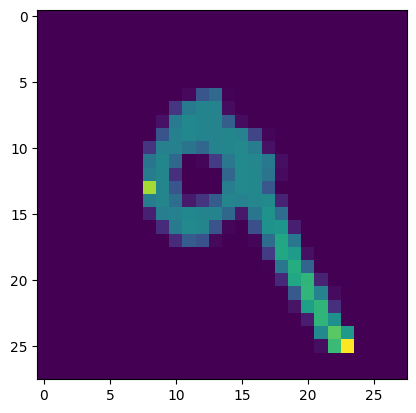

Predicted class label: 9
---------------------------------------------


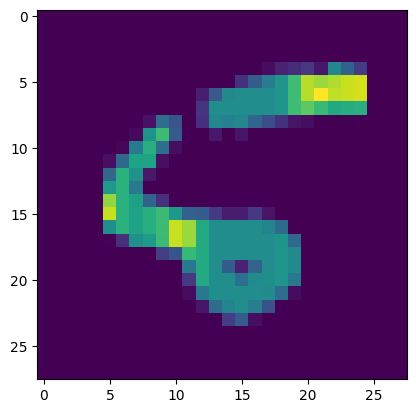

Predicted class label: 5
---------------------------------------------


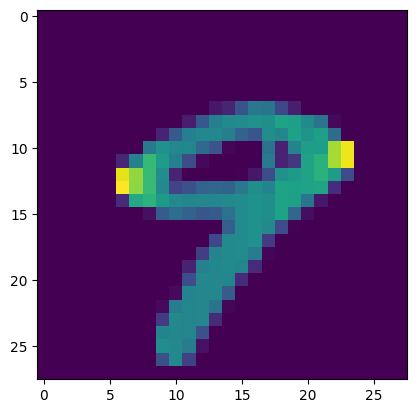

Predicted class label: 9
---------------------------------------------


In [27]:
for i in range(0,10):
    plt.imshow(x_test[i])
    plt.show()  # Display the image
    print(f"Predicted class label: {np.argmax(predictions[i])}")
    print('---------------------------------------------')


# Evaluation on user-made pictures

In [41]:
import cv2
import os
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf # Mnist dataset containing 60k train and 10k test data
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

#IMG_size = 28

In [58]:
directory_path = '/kaggle/input/my-numberss'
lst = []
for i in os.listdir(directory_path):
    file_path = os.path.join(directory_path, i)
    lst.append(file_path)
print(len(lst))

11


In [101]:
def predicted(file):
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    newimg = tf.keras.utils.normalize(resized,axis = 1)
    newimg = np.array(newimg).reshape(-1,IMG_size,IMG_size,1)
    pred = model.predict(newimg) 
    print(f'Number for {file} is ',np.argmax(pred))

In [102]:
%%timeit -n 1 -r 1

for i in lst:
    predicted(i)

1/1 [==============================] - 0s 100ms/step
Number for /kaggle/input/my-numberss/four.png is  4
1/1 [==============================] - 0s 22ms/step
Number for /kaggle/input/my-numberss/six.png is  6
1/1 [==============================] - 0s 21ms/step
Number for /kaggle/input/my-numberss/seven.png is  1
1/1 [==============================] - 0s 21ms/step
Number for /kaggle/input/my-numberss/three.png is  3
1/1 [==============================] - 0s 24ms/step
Number for /kaggle/input/my-numberss/nine2.png is  3
1/1 [==============================] - 0s 21ms/step
Number for /kaggle/input/my-numberss/eight.png is  8
1/1 [==============================] - 0s 21ms/step
Number for /kaggle/input/my-numberss/two.png is  2
1/1 [==============================] - 0s 21ms/step
Number for /kaggle/input/my-numberss/one.png is  1
1/1 [==============================] - 0s 21ms/step
Number for /kaggle/input/my-numberss/seven2.png is  7
1/1 [==============================] - 0s 24ms/step
Number f

In [45]:
# We see that model managed to predict 9 out of 11 numbers correctly.